<a href="https://colab.research.google.com/github/ShiroDima/TID-TIC045/blob/main/PV_Potential_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Relevant Models                                                

In [33]:
! pip install geopandas folium                                              

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt     
import os


# Loading Data                                                 

In [9]:
solcast_index=pd.read_csv('./data/Solcast/Solcast/solcast_index.csv')

state_boundaries=gpd.read_file('./data/nigeria_state_boundaries.csv',
                               GEOM_POSSIBLE_NAMES='geom',
                               KEEP_GEOM_COLUMNS='NO')

In [12]:
solcast_index.head()

,Unnamed: 0,State
0,0,Borno
1,1,Bauchi
2,2,Plateau
3,3,Niger
4,4,Ebonyi


In [36]:
state_boundaries.set_crs("EPSG:3857",inplace=True)
state_boundaries.to_crs("EPSG:4326",inplace=True)

# electricity_supply

In [20]:
# This list contains the file_path to the solar data for the 36 states. Note: This and all other file paths in any notebook all lead to my drive. 
# Specifically, the drive folder for the competition

linklist=['/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/0_9.218209_9.517949/9.218209_9.517949_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/1_6.914868_5.147814/6.914868_5.147814_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/2_8.499791_8.199694/8.499791_8.199694_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/3_9.326475_12.398385/9.326475_12.398385_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/4_6.264923_8.01373/6.264923_8.01373_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/5_12.122181_6.223582/12.122181_6.223582_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/6_12.228012_9.561587/12.228012_9.561587_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/7_12.379671_7.630575/12.379671_7.630575_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/8_13.053314_5.322272/13.053314_5.322272_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/9_11.4942_4.233335/11.4942_4.233335_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/10_10.363779_11.192759/10.363779_11.192759_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/11_11.884636_13.151967/11.884636_13.151967_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/12_7.999362_10.773986/7.999362_10.773986_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/13_11.74707_8.524711/11.74707_8.524711_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/14_10.501518_7.44084/10.501518_7.44084_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/15_7.336902_8.740369/7.336902_8.740369_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/16_5.572012_7.058822/5.572012_7.058822_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/17_10.776062_9.999194/10.776062_9.999194_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/18_9.930922_5.598321/9.930922_5.598321_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M/19_12.293876_11.439041/12.293876_11.439041_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/20_6.997975_3.473738/6.997975_3.473738_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/21_7.733733_6.690584/7.733733_6.690584_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/22_6.2209_6.936956/6.2209_6.936956_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/23_4.905737_7.853667/4.905737_7.853667_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/24_4.771907_6.069853/4.771907_6.069853_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/25_8.157381_3.614653/8.157381_3.614653_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/26_8.9668926_4.387405/8.966896_4.387405_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/27_5.704031_5.933918/5.704031_5.933918_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/28_5.870172_8.598801/5.870172_8.598801_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/29_6.536353_7.435619/6.536353_7.435619_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/30_6.634183_5.930406/6.634183_5.930406_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/31_7.562896_4.519959/7.562896_4.519959_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/32_5.452735_7.524841/5.452735_7.524841_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/33_8.894069_7.18604/8.894069_7.18604_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/34_7.718986_5.310951/7.718986_5.310951_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/34_7.718986_5.310951/7.718986_5.310951_Solcast_PT60M.csv',
          '/content/drive/MyDrive/TID_Innovation/Data/Solcast/Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M/36_6.522704_3.62178/6.522704_3.62178_Solcast_PT60M.csv']

In [11]:
def get_irradiance(state,csv_path):
  '''This function reads in, cleans and calculates the relevant data from given files'''
  # Reading_csv
  state=pd.read_csv(csv_path)
  # Retrieving_the_date_from_the_PeriodStart_column
  state[['date','start_time']]=state['PeriodStart'].str.split('T',expand=True)
  # Converting the hourly irradiance data to daily irradiance data(Wh/day/m2)                                          
  daily_irradiance=state.groupby('date').sum()[['Ghi','GtiFixedTilt','GtiTracking']]
  # calculates and returns the average daily irradiance data for the year 2022. It also converts it from W to KW                               
  return(list(round(daily_irradiance.mean()/1000,2)))                                                

In [25]:
# Applies the function across all states dataset and appends the result to the empty list                                   
irradiance_list=[]
for index,link in enumerate(linklist):
  state=solcast_index.loc[index,'State']
  irradiance_list.append(get_irradiance(state, link.replace("/content/drive/MyDrive/TID_Innovation/Data", "./data/Solcast")))
  

In [26]:
# Creates_DataFrame
Ghi=[item[0] for item in irradiance_list]
GtiFixedTilt=[item[1] for item in irradiance_list]
GtiTracking=[item[2] for item in irradiance_list]
state=list(solcast_index.State)
df_dict={'state':state,'ghi':Ghi,'gtifixed':GtiFixedTilt,'gtitracking':GtiTracking}
avg_daily_irradiance_2022=pd.DataFrame(df_dict)
avg_daily_irradiance_2022

,state,ghi,gtifixed,gtitracking
0,Borno,5.22,5.33,5.99
1,Bauchi,4.57,4.60,5.02
2,Plateau,5.01,5.08,5.70
3,Niger,5.43,5.53,6.31
4,Ebonyi,4.73,4.76,5.23
5,Zamfara,5.46,5.59,6.32
6,Yobe,5.50,5.60,6.33
7,Nasarawa,5.69,5.82,6.64
8,Ondo,5.59,5.72,6.49
9,Jigawa,5.42,5.53,6.22


In [41]:
# Merges the irradiance data to the state_map Data                                           
state_irradiance=state_boundaries.merge(avg_daily_irradiance_2022,left_on='adm1_en',right_on='state')

# Map

Text(47.097222222222214, 0.5, 'latitude')

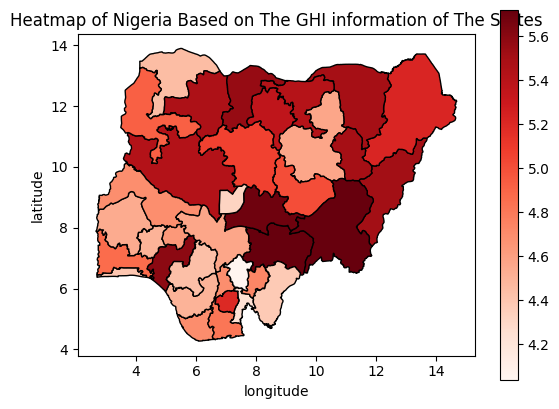

In [42]:
state_irradiance.plot(column='ghi',
                      cmap='Reds',
                      edgecolor='black',
                      legend=True)

plt.title('Heatmap of Nigeria Based on The GHI information of The States')
plt.xlabel('longitude')
plt.ylabel('latitude')

In [18]:
irradiance_list=[]
# linklist
for path, name, files in os.walk('./data/Solcast/Solcast', topdown=True):
    # # Applies the function across all states dataset and appends the result to the empty list                                   
    # for index,link in enumerate(linklist):
    # state = solcast_index.loc[index,'State']
    # irradiance_list.append(get_irradiance(state,link))
    print(path)
    if name:
        print(name)
    print(files)

./data/Solcast/Solcast
['Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M', 'Time_Series_dd31c967-0d34-40d0-a2b5-235f39283a4c_Solcast_PT60M-20230513T193101Z-001']
None
./data/Solcast/Solcast\Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M
['0_9.218209_9.517949', '10_10.363779_11.192759', '11_11.884636_13.151967', '12_7.999362_10.773986', '13_11.74707_8.524711', '14_10.501518_7.44084', '15_7.336902_8.740369', '16_5.572012_7.058822', '17_10.776062_9.999194', '18_9.930922_5.598321', '19_12.293876_11.439041', '1_6.914868_5.147814', '2_8.499791_8.199694', '3_9.326475_12.398385', '4_6.264923_8.01373', '5_12.122181_6.223582', '6_12.228012_9.561587', '7_12.379671_7.630575', '8_13.053314_5.322272', '9_11.4942_4.233335']
None
./data/Solcast/Solcast\Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M\0_9.218209_9.517949
None
./data/Solcast/Solcast\Time_Series_4632b303-484b-4395-a713-4116b250ba35_Solcast_PT60M\10_10.363779_11.192759
None
./data/Solcast/Solca